In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from scipy.optimize import curve_fit

import gm2
import trfp
import plotting_functions as plt2
import analysis_helper as helper
import helper_function_candidates as helper_old

Welcome to JupyROOT 6.12/04


In [2]:
vtm_dict = {'60hr':['vtm_1'],
            '9day':['vtm_1', 'vtm_2', 'vtm_3', 'vtm_4'],
            'endgame':['vtm_2', 'vtm_3', 'vtm_4', 'vtm_5', 'vtm_6'],
            'highkick':['vtm_1', 'vtm_2']}

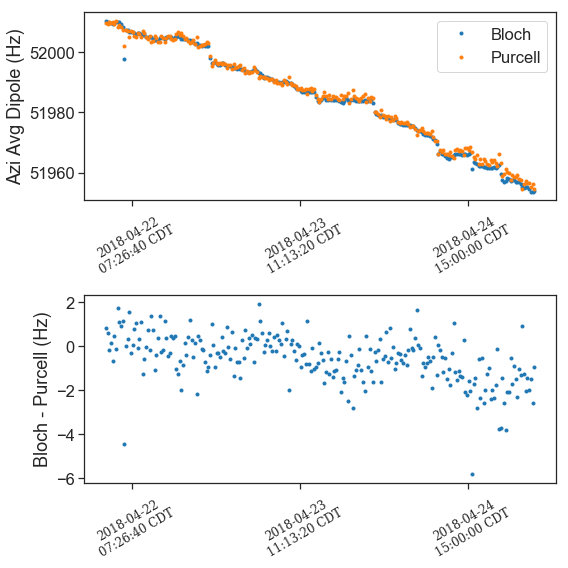

In [3]:
run = '60hr'
vtm = vtm_dict[run][0]

bloch_file = 'utility_files/bloch_unblind_'+run+'_'+vtm+'.txt'
purcell_file = 'utility_files/'+run+'_vtms_unblinded_2020-04-15_'+vtm+'.csv'

bloch = np.loadtxt(bloch_file, delimiter=',')
purcell = np.loadtxt(purcell_file, skiprows=1, delimiter=',')

fig, axs = plt.subplots(2,1)

axs[0].plot(bloch[3:-1,0], bloch[3:-1,1], '.', label='Bloch')
axs[0].plot(purcell[:,0], purcell[:,1], '.', label='Purcell')

axs[0].set_ylabel("Azi Avg Dipole (Hz)")
axs[0].legend()

axs[1].plot(purcell[:,0], (bloch[3:-1,1] - purcell[:,1]), '.')
axs[1].set_ylabel("Bloch - Purcell (Hz)")

plt2.plt_unix_time_to_CST(axs[0])
plt2.plt_unix_time_to_CST(axs[1])

fig.set_size_inches(8,8)
fig.tight_layout()

In [4]:
averages = np.zeros([12,5])
errors = np.zeros([12,5])
bloch_ = np.zeros([12,5])
purcell_ = np.zeros([12,5])
ii = 0

for run in vtm_dict:
    for vtm in vtm_dict[run]:

        bloch_file = 'utility_files/bloch_unblind_'+run+'_'+vtm+'.txt'
        purcell_file = 'utility_files/'+run+'_vtms_unblinded_2020-04-15_'+vtm+'.csv'

        bloch = np.loadtxt(bloch_file, delimiter=',')
        purcell = np.loadtxt(purcell_file, skiprows=1, delimiter=',')

        bloch[:,0] = np.round(bloch[:,0], -1)
        bloch_df = pd.DataFrame(bloch[:,1:], index=bloch[:,0])

        averages[ii, 0] = np.mean(purcell[:,0])
        averages[ii, 1] = np.mean(bloch_df.loc[purcell[:,0]][0] - purcell[:,1])
        averages[ii, 2] = np.mean(bloch_df.loc[purcell[:,0]][2] - purcell[:,2])
        averages[ii, 3] = np.mean(bloch_df.loc[purcell[:,0]][4] - purcell[:,3])
        averages[ii, 4] = np.mean(bloch_df.loc[purcell[:,0]][6] - purcell[:,5])
        
        bloch_[ii, 0] = np.mean(purcell[:,0])
        bloch_[ii, 1] = np.mean(bloch_df.loc[purcell[:,0]][0])
        bloch_[ii, 2] = np.mean(bloch_df.loc[purcell[:,0]][2])
        bloch_[ii, 3] = np.mean(bloch_df.loc[purcell[:,0]][4])
        bloch_[ii, 4] = np.mean(bloch_df.loc[purcell[:,0]][6])
        
        purcell_[ii, 0] = np.mean(purcell[:,0])
        purcell_[ii, 1] = np.mean(purcell[:,1])
        purcell_[ii, 2] = np.mean(purcell[:,2])
        purcell_[ii, 3] = np.mean(purcell[:,3])
        purcell_[ii, 4] = np.mean(purcell[:,5])

        errors[ii, 0] = np.mean(purcell[:,0])
        errors[ii, 1] = np.std(bloch_df.loc[purcell[:,0]][0] - purcell[:,1])
        errors[ii, 2] = np.std(bloch_df.loc[purcell[:,0]][2] - purcell[:,2])
        errors[ii, 3] = np.std(bloch_df.loc[purcell[:,0]][4] - purcell[:,3])
        errors[ii, 4] = np.std(bloch_df.loc[purcell[:,0]][6] - purcell[:,5])
        
        ii = ii + 1

In [6]:
print averages

[[ 1.52541050e+09 -1.57992255e+00 -3.61111315e-01  6.34535550e-01
   1.71926213e-02]
 [ 1.52568600e+09  3.11658895e-01 -2.33858417e-01 -6.77146748e-02
   5.21665896e-01]
 [ 1.52591350e+09  1.47015256e-01 -1.62697266e+00 -5.27325987e-02
  -5.28192863e-01]
 [ 1.52615050e+09 -1.36457681e+00 -5.54550755e-01 -1.88962232e-02
   1.00169419e-01]
 [ 1.52880750e+09  1.24151519e+00 -1.10443794e+00 -6.08373180e-01
  -7.37553879e-01]
 [ 1.52916150e+09  7.69214513e-01  6.81783164e-01  1.54155627e-01
   1.88614386e-01]
 [ 1.52953650e+09 -1.20622239e+00  1.54762718e+00  8.45893263e-01
  -6.80488250e-01]
 [ 1.52983500e+09 -2.10078491e-01  6.93090899e-02 -1.85215866e-01
   5.73785436e-01]
 [ 1.53011900e+09  9.61634169e-01  1.16353035e-01  4.83843472e-01
   6.34165577e-04]
 [ 1.52451200e+09 -5.65388340e-01 -2.82052872e-01 -1.72767934e-01
  -8.12895411e-01]
 [ 1.52491450e+09 -1.11893912e+00  2.95769201e-01  6.68385757e-01
  -2.94142255e-01]
 [ 1.52516100e+09  1.33408036e+00 -6.73466488e-01  1.66418789e-01

In [ ]:
print np.argmin(averages[:,0])
print averages[9,1]
print errors[9,1]

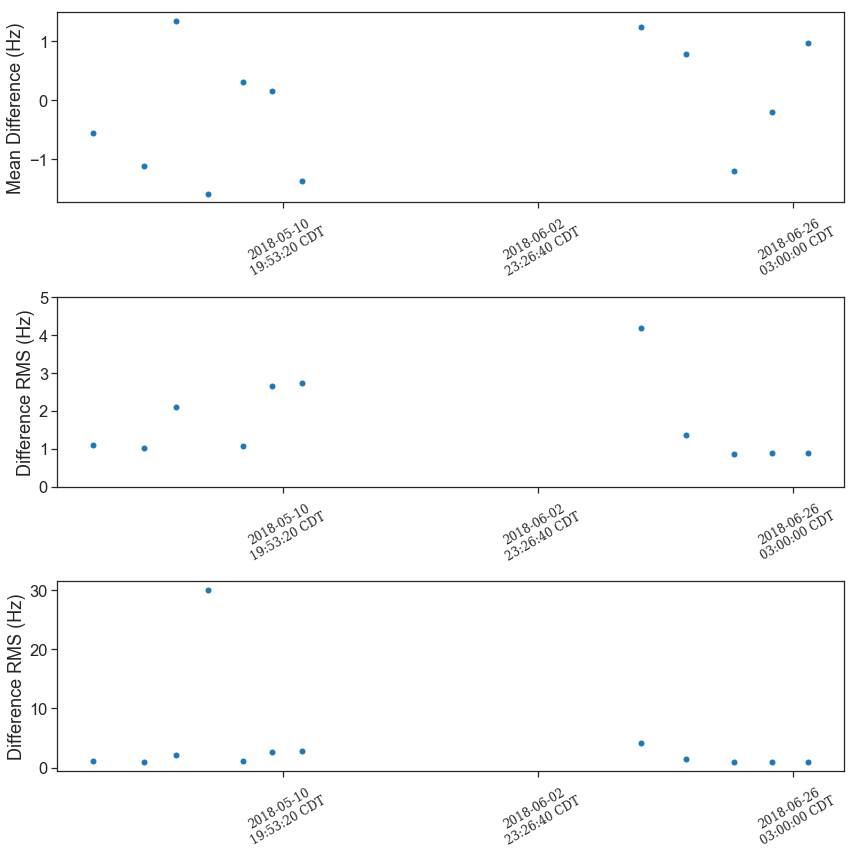

In [5]:
fig, axs = plt.subplots(3,1)

axs[0].plot(averages[:,0], averages[:,1], '.', markersize=10)
axs[0].set_ylabel('Mean Difference (Hz)')
axs[1].plot(errors[:,0], errors[:,1], '.', markersize=10)
axs[1].set_ylim([0,5])
axs[1].set_ylabel('Difference RMS (Hz)')
axs[2].plot(errors[:,0], errors[:,1], '.', markersize=10)
axs[2].set_ylabel('Difference RMS (Hz)')

plt2.plt_unix_time_to_CST(axs[0])
plt2.plt_unix_time_to_CST(axs[1])
plt2.plt_unix_time_to_CST(axs[2])

fig.set_size_inches(12,12)
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(1,1)

ax.hist(averages[:,1], bins=20)
ax.set_xlabel('Difference Mean (Hz)')
ax.set_ylabel('Counts')

fig.set_size_inches(8,4)
fig.tight_layout()

print np.mean(averages[:,1])
print np.std(averages[:,1])
print np.max(averages[:,1]) - np.min(averages[:,1])